<a href="https://colab.research.google.com/github/YahtzeeRage/cs480student/blob/main/05/YahiyaHussain_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

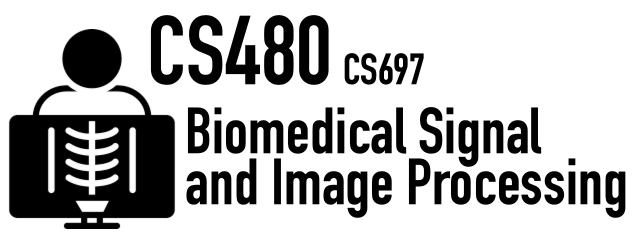
#Assignment 5

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 1.9MB 7.2MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [3]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

!curl https://cs480.org/data/ct.zip --output ct.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5710k  100 5710k    0     0   9.7M      0 --:--:-- --:--:-- --:--:--  9.7M


In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?


In [ ]:
# Looking at the unzipped folder, I see that the images are numbered from 1 to 220
# and are slices and so there are 220 slices.

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

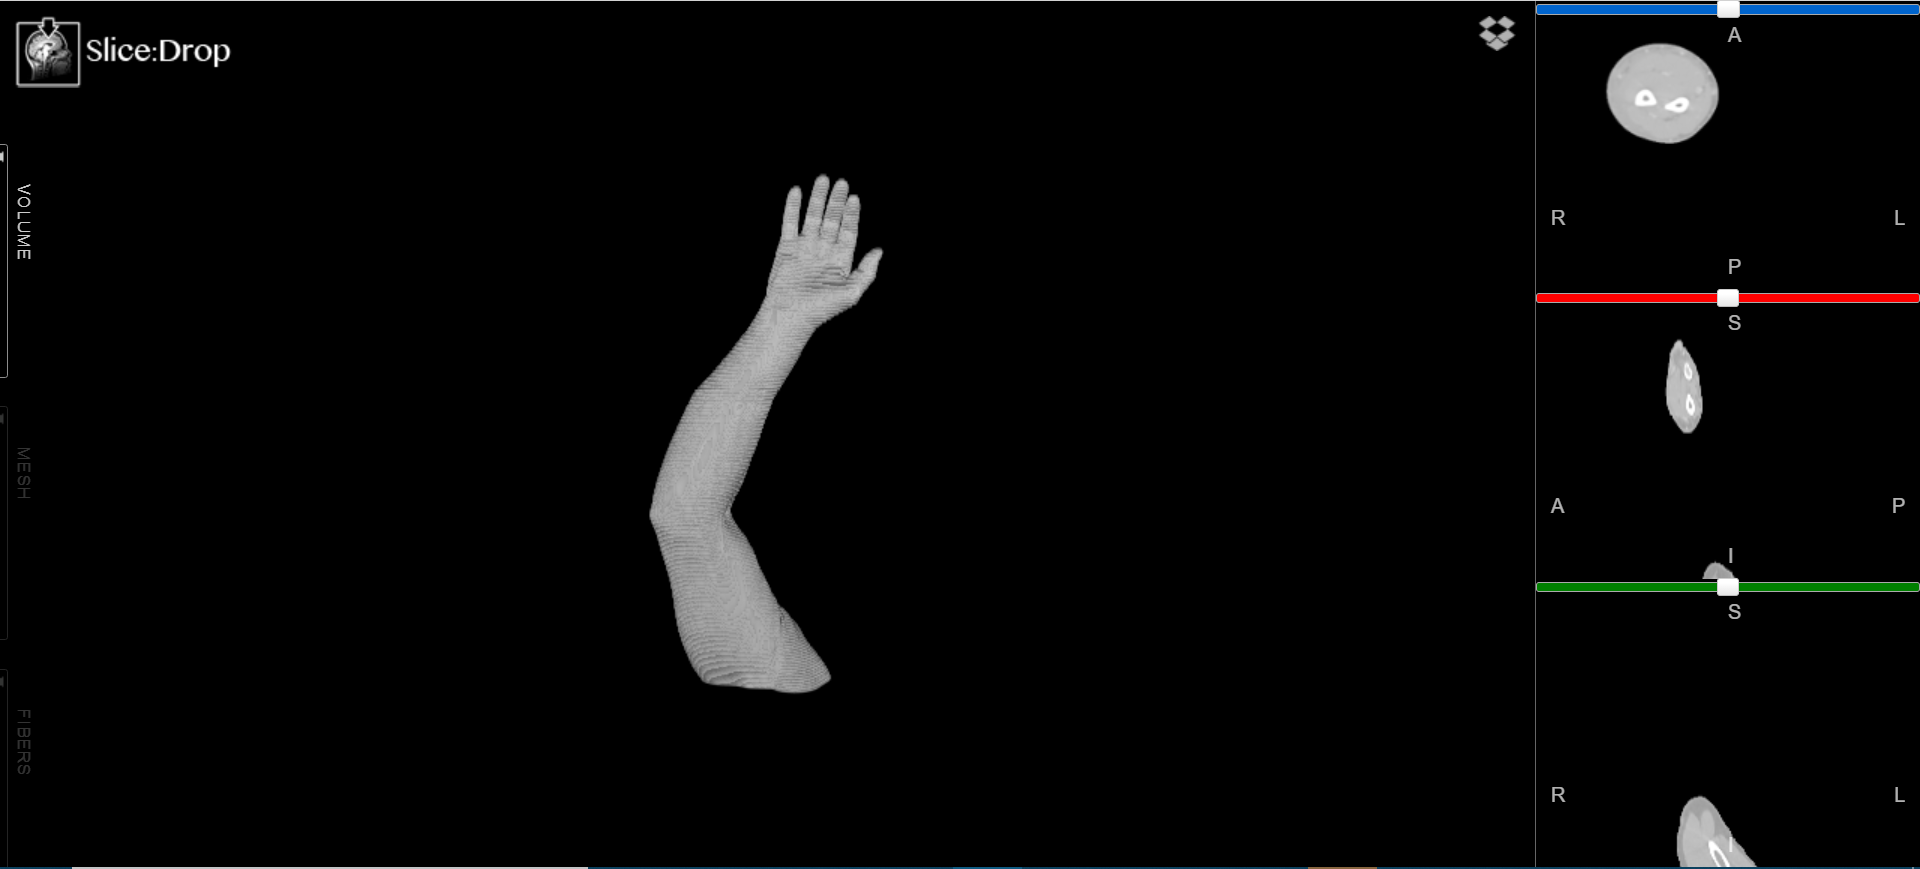

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [4]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [5]:
from pydicom import dcmread

In [97]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
import os

DIR = "./ct"
sorted_slice_paths = os.listdir(DIR)
sorted_slice_paths.sort()
dicom_imgs = []
slice_imgs = []
for slice_path in sorted_slice_paths:
  dicom_img = dcmread(os.path.join(DIR, slice_path))
  dicom_imgs.append(dicom_img)
  img = np.expand_dims(dicom_img.pixel_array, -1)
  slice_imgs.append(img)

slice_volume = np.array(slice_imgs).squeeze()
print(slice_volume.shape)

(220, 454, 512)


In [64]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

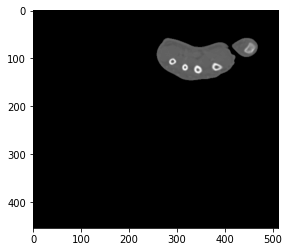

In [96]:
# TODO: YOUR CODE FOR AXIAL
imshow(slice_volume[45], cmap='gray')

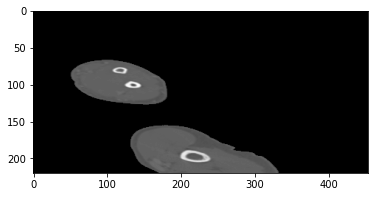

In [87]:
# TODO: YOUR CODE FOR SAGITTAL
imshow(slice_volume[:,:,210], cmap='gray')

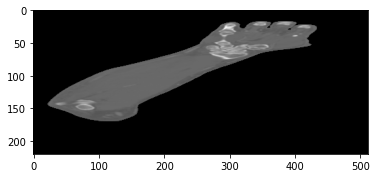

In [93]:
# TODO: YOUR CODE FOR CORONAL
imshow(slice_volume[:,100,:], cmap='gray')


**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [118]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

30
410
-1024


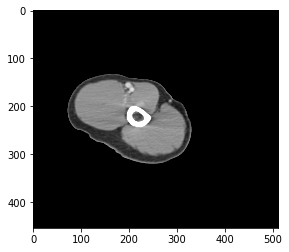

In [206]:
# TODO: YOUR CODE

image_index = 200
WindowCenter = dicom_imgs[image_index].WindowCenter
WindowWidth = dicom_imgs[image_index].WindowWidth
RescaleIntercept = dicom_imgs[image_index].RescaleIntercept
print(WindowCenter)
print(WindowWidth)
print(RescaleIntercept)

vmin = WindowCenter - WindowWidth/2
vmax = WindowCenter + WindowWidth/2 
plt.imshow(slice_volume[image_index] + RescaleIntercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()


15.0
340.0
-1054.0


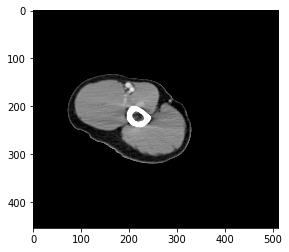

In [256]:

# TODO: YOUR CODE

image_index = 200
WindowCenter = dicom_imgs[image_index].WindowCenter-15
WindowWidth = dicom_imgs[image_index].WindowWidth-70
RescaleIntercept = dicom_imgs[image_index].RescaleIntercept -30
print(WindowCenter)
print(WindowWidth)
print(RescaleIntercept)

vmin = WindowCenter - WindowWidth/2
vmax = WindowCenter + WindowWidth/2 
plt.imshow(slice_volume[image_index] + RescaleIntercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?


In [ ]:
# I thought the original viewing was quite nice but I noticed it was a bit more
# homogenous than it should be and the skin and nearby tissue seemed a bit brighter
# than their importance on the scan. Thus I decreased the window width to focus on the
# central grey tissue and bone a bit better an less so the small surrounding darker tissue
# and skin, but I shifted Window Center slightly to make sure not to omit the surrounding
# darker tissue entirely. I then sharpened the contrast between layers by decreasing the
# rescale intercept



**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

-80
20
-1024


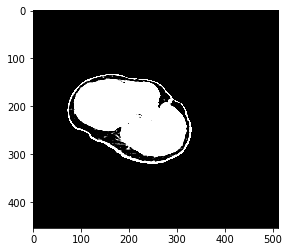

In [272]:
# TODO: YOUR CODE TO SEGMENT FAT

image_index = 200
WindowCenter = -80
WindowWidth = 20
RescaleIntercept = dicom_imgs[image_index].RescaleIntercept
print(WindowCenter)
print(WindowWidth)
print(RescaleIntercept)

vmin = WindowCenter - WindowWidth/2
vmax = WindowCenter + WindowWidth/2 
plt.imshow(slice_volume[image_index] + RescaleIntercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

60
20
-1009.0


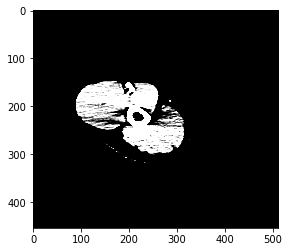

In [284]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

image_index = 200
WindowCenter = 60
WindowWidth = 20
RescaleIntercept = dicom_imgs[image_index].RescaleIntercept +15
print(WindowCenter)
print(WindowWidth)
print(RescaleIntercept)

vmin = WindowCenter - WindowWidth/2
vmax = WindowCenter + WindowWidth/2 
plt.imshow(slice_volume[image_index] + RescaleIntercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

700
300
-1024


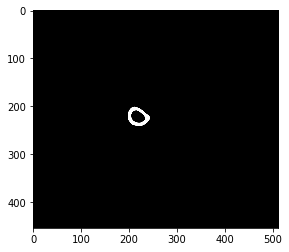

In [279]:
# TODO: YOUR CODE TO SEGMENT BONES
image_index = 200
WindowCenter = 700
WindowWidth = 300
RescaleIntercept = dicom_imgs[image_index].RescaleIntercept
print(WindowCenter)
print(WindowWidth)
print(RescaleIntercept)

vmin = WindowCenter - WindowWidth/2
vmax = WindowCenter + WindowWidth/2 
plt.imshow(slice_volume[image_index] + RescaleIntercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Are the segmentations good?


In [ ]:
# The bone segmentation is extremely good as expected. The fat segmentation seems pretty good
# since fat is generally located under the skin and surrounding muscles (soft tissue). The Soft
# tissue segmentation was not very good but generally was correct as it looks like the muscle, though I
# am unsure if it should go further than that but I needed to increase the intercept to get it to 
# be more whole looking like it should be.

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""